# Import Packages and Reading of Data

In [1]:
import time
import warnings
import pickle
import shap

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, RepeatedKFold
from xgboost import plot_importance
from bayes_opt import BayesianOptimization

pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")

In [2]:
# Reading of Excel
train_metadata = pd.read_csv('train_dataset.csv')
test_metadata = pd.read_csv('test_dataset.csv')

In [3]:
train_metadata

,protected,verified,location,followers_count,following_count,tweet_count,listed_count,has_profile_image,un_no_of_char,un_special_char,name_no_of_char,name_special_char,des_no_of_usertags,des_no_of_hashtags,des_external_links,has_description,has_url,isBot
0,0,0,0,-0.058996,-0.101765,-0.375390,-0.064435,1,-0.277500,0,-0.270732,0,-0.264936,-0.226362,0,1,1,1
1,0,0,0,-0.058509,-0.061982,-0.024002,-0.064274,1,-0.277500,0,-1.193893,0,-0.264936,-0.226362,0,1,0,0
2,0,0,1,-0.058917,-0.092427,-0.206857,-0.062335,1,0.094003,0,0.467797,0,-0.264936,-0.226362,0,1,1,0
3,0,0,1,-0.057353,0.078232,-0.321707,-0.059427,1,1.580014,0,0.098533,0,6.295222,-0.226362,1,1,1,0
4,0,0,1,-0.058873,-0.094191,-0.207697,-0.064112,1,-0.277500,0,-0.270732,0,-0.264936,-0.226362,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16226,0,1,1,0.183041,2.307269,0.000665,-0.002560,1,1.580014,1,0.652429,0,-0.264936,-0.226362,1,1,1,1
16227,0,0,1,-0.058544,-0.093461,-0.219648,-0.057004,1,-0.277500,0,1.390958,0,-0.264936,-0.226362,0,1,0,0
16228,0,0,1,-0.058863,-0.095256,-0.194927,-0.062820,1,1.208511,0,0.652429,0,-0.264936,-0.226362,0,1,1,0
16229,0,0,0,-0.058952,-0.071228,-0.375411,-0.064274,1,-0.277500,0,-0.270732,0,-0.264936,-0.226362,0,1,1,1


In [4]:
test_metadata

,protected,verified,location,followers_count,following_count,tweet_count,listed_count,has_profile_image,un_no_of_char,un_special_char,name_no_of_char,name_special_char,des_no_of_usertags,des_no_of_hashtags,des_external_links,has_description,has_url,isBot
0,0,0,1,-0.058983,-0.100670,-0.376092,-0.063789,1,0.094003,1,-0.086100,0,-0.264936,-0.226362,0,1,0,0
1,0,0,1,-0.058989,-0.103012,-0.357559,-0.063466,1,-0.277500,1,1.206326,0,-0.264936,-0.226362,0,1,1,0
2,0,0,1,-0.058999,-0.105992,-0.292224,-0.064435,1,1.208511,1,1.206326,0,-0.264936,-0.226362,0,1,1,0
3,0,0,1,-0.058434,-0.075790,-0.296583,-0.059750,1,-0.649002,0,1.390958,1,1.375103,-0.226362,0,1,1,0
4,0,0,0,-0.046815,-0.021621,2.165586,-0.013061,1,1.580014,1,-1.563157,0,1.375103,-0.226362,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053,0,0,0,-0.058997,-0.100578,-0.375454,-0.064435,1,-0.649002,0,-0.455364,0,-0.264936,-0.226362,0,1,1,1
4054,0,0,1,-0.058892,-0.086253,-0.217617,-0.063789,1,-0.277500,0,-1.193893,0,-0.264936,-0.226362,0,1,0,0
4055,0,0,1,-0.058947,-0.084458,-0.365236,-0.062335,1,0.465506,0,0.098533,0,3.015143,-0.226362,0,1,0,0
4056,0,0,1,-0.058681,-0.097932,-0.282102,-0.020977,1,-1.020505,0,0.098533,0,-0.264936,-0.226362,0,1,1,1


In [5]:
x_train = train_metadata.drop(columns = "isBot")
x_test = test_metadata.drop(columns = "isBot")
y_train = train_metadata["isBot"]
y_test = test_metadata["isBot"]

# Models
1. Logistic Regression
2. Support Vector Classifier
3. Random Forest Classifier
4. Adaboost Classifer
5. XGBoost Classifier

## 05 XGBoost Classifier
* Model (Grid Search + Bayesian Optimisation)
* Error Metrics
* Plot for Feature Importance

### Model (Grid Search)

In [6]:
weight_train = y_train.value_counts()[0] / y_train.value_counts()[1]

In [11]:
xgb_search = XGBClassifier(scale_pos_weight = weight_train,
                           gamma = 0.1,
                           alpha = 0.5,
                           objective = "binary:logistic",
                           eval_metric = "logloss")

grid_xgb = {"max_depth": [5, 10, 15, 20, 25], 
            "subsample": [0.6, 0.8, 1.0], 
            "eta": [0.01, 0.1, 0.5], 
            "colsample_bytree": [0.7, 0.8, 0.9, 1.0]}

grid_search = GridSearchCV(estimator = xgb_search,
                           param_grid = grid_xgb,
                           scoring = 'f1',
                           n_jobs = -1,
                           cv = 5,
                           verbose = 2)

In [12]:
%%time

results_grid_xgb = grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Wall time: 25min 4s


In [13]:
print('Best Score: %s' % results_grid_xgb.best_score_)
print('Best Hyperparameters: %s' % results_grid_xgb.best_params_)

Best Score: 0.8763163050895859
Best Hyperparameters: {'colsample_bytree': 0.7, 'eta': 0.1, 'max_depth': 25, 'subsample': 0.8}


In [14]:
%%time

# y_prediction for the best model using GridSearchCV
y_pred_grid = results_grid_xgb.predict(x_test)

Wall time: 49.4 ms


In [15]:
# Metrics
accuracy = metrics.accuracy_score(y_test, y_pred_grid)
print(f'Accuracy: {accuracy}')
lg_loss = metrics.log_loss(y_test, y_pred_grid)
print(f'Log Loss: {lg_loss}')
roc_auc = metrics.roc_auc_score(y_test, y_pred_grid)
print(f'ROC AUC: {roc_auc}')
f1_score = metrics.f1_score(y_test, y_pred_grid)
print(f'F1-score: {f1_score}')
precision = metrics.precision_score(y_test, y_pred_grid)
print(f'Precision: {precision}')
recall = metrics.recall_score(y_test, y_pred_grid)
print(f'Recall: {recall}')

Accuracy: 0.9346968950221785
Log Loss: 2.2555072715666533
ROC AUC: 0.9053934057007827
F1-score: 0.8745858968291529
Precision: 0.9103448275862069
Recall: 0.8415300546448088


### Model (Bayesian Optimisation)

In [16]:
def xgboost_hyper_pram(eta, max_depth, subsample, gamma, colsample_bytree, alpha):
    max_depth = int(max_depth)
    xgb_classifier = XGBClassifier(max_depth = max_depth, 
                                   eta = eta, 
                                   gamma = gamma,
                                   subsample = subsample,
                                   colsample_bytree = colsample_bytree,
                                   alpha = alpha,
                                   scale_pos_weight = weight_train,
                                   objective = "binary:logistic",
                                   eval_metric = "logloss")
    
    cross_val = cross_val_score(xgb_classifier, x_train, y_train, cv = 5, scoring = 'f1')
    
    return (np.mean(cross_val))

In [17]:
optim_model = BayesianOptimization(xgboost_hyper_pram, 
                                   {'max_depth' : (1, 30), 
                                   'eta' : (0, 0.2), 
                                   'gamma' : (0, 1),
                                   'subsample' : (0, 1),
                                   'colsample_bytree' : (0, 1),
                                   'alpha' : (0, 1)},
                                   random_state = 101)

In [18]:
%%time 

optim_model.maximize(n_iter = 15, init_points = 25, acq='ei')

|   iter    |  target   |   alpha   | colsam... |    eta    |   gamma   | max_depth | subsample |
-------------------------------------------------------------------------------------------------
| 1         | 0.8732    | 0.5164    | 0.5707    | 0.005695  | 0.1715    | 20.87     | 0.8339    |
| 2         | 0.8708    | 0.307     | 0.8936    | 0.1443    | 0.1899    | 17.07     | 0.3521    |
| 3         | 0.8599    | 0.1819    | 0.7856    | 0.1931    | 0.2324    | 3.423     | 0.6035    |
| 4         | 0.8246    | 0.729     | 0.2762    | 0.1371    | 0.5179    | 2.406     | 0.1379    |
| 5         | 0.8738    | 0.187     | 0.9943    | 0.1041    | 0.5788    | 22.31     | 0.542     |
| 6         | 0.8717    | 0.9132    | 0.8079    | 0.0806    | 0.3572    | 28.63     | 0.3436    |
| 7         | 0.8535    | 0.8651    | 0.8303    | 0.1076    | 0.9225    | 3.817     | 0.1028    |
| 8         | 0.8704    | 0.7015    | 0.8905    | 0.03191   | 0.2756    | 20.5      | 0.1643    |
| 9         | 0.8323

In [19]:
print('Best Score: %s' % optim_model.max["target"])
print('Best Hyperparameters: %s' % optim_model.max['params'])

Best Score: 0.8742896014203065
Best Hyperparameters: {'alpha': 0.9422592888574909, 'colsample_bytree': 0.7364913312678585, 'eta': 0.047692877598892715, 'gamma': 0.8237737282701928, 'max_depth': 23.057789910285912, 'subsample': 0.39470907403720557}


### Model (Optimal Hyperparameters)

In [20]:
print("Grid Search:", results_grid_xgb.best_score_)  
print("Bayesian Optimisation:", optim_model.max["target"]) 

Grid Search: 0.8763163050895859
Bayesian Optimisation: 0.8742896014203065


In [22]:
# Model (initialise the object based on parameters selected by Grid Search)
params_xgb = results_grid_xgb.best_params_
xgb_classifier = XGBClassifier(gamma = 0.1,
                               alpha = 0.5,
                               max_depth = int(params_xgb['max_depth']), 
                               eta = params_xgb['eta'], 
                               subsample = params_xgb['subsample'],
                               colsample_bytree = params_xgb['colsample_bytree'],
                               scale_pos_weight = weight_train,
                               objective = "binary:logistic",
                               eval_metric = "logloss")

In [23]:
%%time

# Fit Model
xgb_model = xgb_classifier.fit(x_train, y_train)

Wall time: 2.8 s


In [24]:
%%time

# y_prediction for the best model
y_pred_optimal = xgb_model.predict(x_test)

Wall time: 23.3 ms


In [25]:
# Metrics
accuracy = metrics.accuracy_score(y_test, y_pred_optimal)
print(f'Accuracy: {accuracy}')
lg_loss = metrics.log_loss(y_test, y_pred_optimal)
print(f'Log Loss: {lg_loss}')
roc_auc = metrics.roc_auc_score(y_test, y_pred_optimal)
print(f'ROC AUC: {roc_auc}')
f1_score = metrics.f1_score(y_test, y_pred_optimal)
print(f'F1-score: {f1_score}')
precision = metrics.precision_score(y_test, y_pred_optimal)
print(f'Precision: {precision}')
recall = metrics.recall_score(y_test, y_pred_optimal)
print(f'Recall: {recall}')
report = metrics.classification_report(y_test, y_pred_optimal)
print(f'Classification Report: \n {report}')

Accuracy: 0.9346968950221785
Log Loss: 2.2555072715666533
ROC AUC: 0.9053934057007827
F1-score: 0.8745858968291529
Precision: 0.9103448275862069
Recall: 0.8415300546448088
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      2960
           1       0.91      0.84      0.87      1098

    accuracy                           0.93      4058
   macro avg       0.93      0.91      0.92      4058
weighted avg       0.93      0.93      0.93      4058



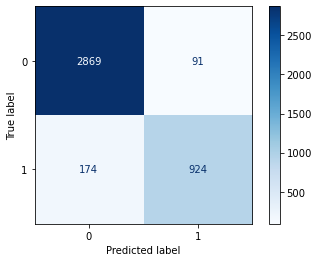

In [26]:
# Confusion Matrix Plot
metrics.plot_confusion_matrix(xgb_model, x_test, y_test, cmap = "Blues")
plt.show()

## Feature Importance

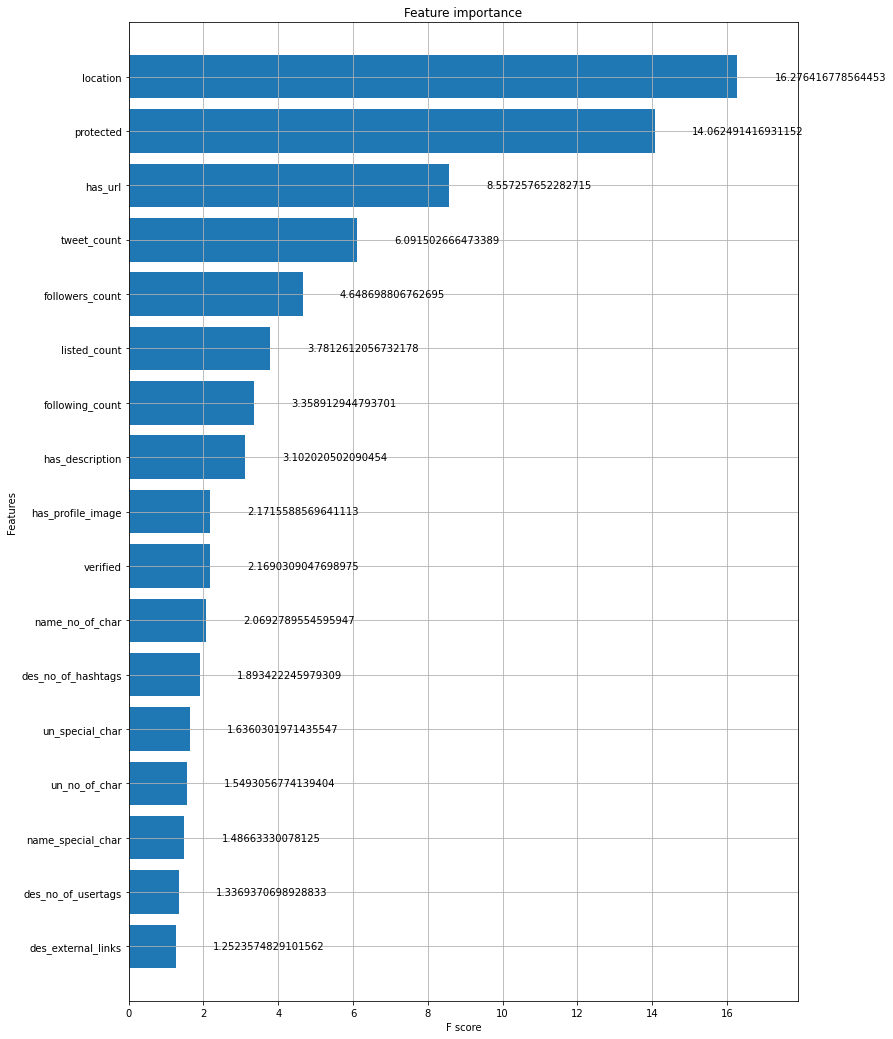

In [27]:
fig, ax = plt.subplots(figsize=(12,18))
plot_importance(xgb_model, importance_type = 'gain', height=0.8, ax=ax)
plt.show()

In [46]:
# Local Level
shap.initjs()
explainer = shap.Explainer(xgb_model.predict_proba, x_train)
shap_values = explainer(x_test.iloc[[1302]])
shap_values = shap_values[...,1]
shap.plots.force(shap_values)

In [47]:
# df = pd.DataFrame(user, coluns=x_train.columns)
xgb_model.predict_proba(x_test.iloc[[1302]])

array([[0.9912531 , 0.00874695]], dtype=float32)

Permutation explainer: 4059it [12:47,  5.60it/s]                                                                       


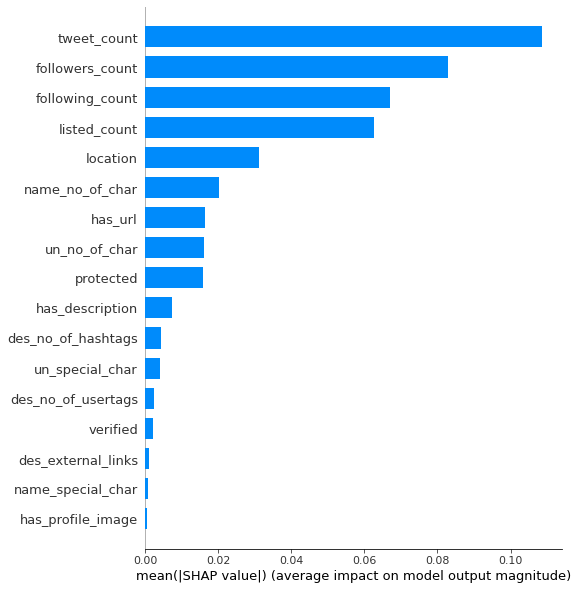

In [48]:
# Global Level
shap_values_global = explainer(x_test)
shap_values_global = shap_values_global[...,1]
shap.summary_plot(shap_values_global, feature_names = x_test.columns, plot_type = "bar", sort = True)